# Introdução:

# Código:

## Bibliotecas:

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

## Funções:

In [39]:
# Função para calcular a aceleração e eficiência de programas sequenciais e concorrentes.
# A aceleração é a razão entre o tempo de execução do programa sequencial e o tempo do programa concorrente.
# A eficiência é a aceleração dividida pelo número de threads utilizadas no programa concorrente.
# O código lê um arquivo CSV com os tempos de execução de diferentes programas, agrupa os dados por parâmetros relevantes,
# e calcula a aceleração e eficiência para cada par de programas sequenciais e concorrentes.

def calcular_aceleracao_eficiencia(caminho_arquivo):
    # Ler o arquivo CSV em um DataFrame do pandas
    df = pd.read_csv(caminho_arquivo)
    
    # Lista para armazenar os resultados de aceleração e eficiência
    resultados = []
    
    # Dicionário que mapeia os programas sequenciais para seus equivalentes concorrentes
    pares_programas = {
        "SeqMinMaxSort": "ConcMinMaxSort",  # Par: programa sequencial e seu equivalente concorrente
        "SeqQuicksort": "ConcQuicksort"     # Outro par: programa sequencial e seu equivalente concorrente
    }
    
    # Agrupar os dados para programas sequenciais, agrupando por 'Comprimento' e 'Programa'
    # 'Tempo' é a média dos tempos de execução para cada grupo
    tempo_seq = df[df['Programa'].str.startswith("Seq")].groupby(['Comprimento', 'Programa'])['Tempo'].mean().reset_index()

    # Agrupar os dados para programas concorrentes, agrupando por 'Threads', 'Comprimento' e 'Programa'
    # 'Tempo' também é a média dos tempos de execução para cada grupo
    tempo_conc = df[df['Programa'].str.startswith("Conc")].groupby(['Threads', 'Comprimento', 'Programa'])['Tempo'].mean().reset_index()

    # Iterar sobre os pares de programas sequenciais e concorrentes
    for programa_seq, programa_conc in pares_programas.items():
        # Obter os dados do programa sequencial correspondente
        tempo_seq_data = tempo_seq[tempo_seq['Programa'] == programa_seq]
        
        # Iterar sobre os diferentes valores de 'Comprimento' no programa sequencial
        for comprimento in tempo_seq_data['Comprimento'].unique():
            tempo_seq_val = tempo_seq_data[tempo_seq_data['Comprimento'] == comprimento]['Tempo'].values[0]
            
            # Obter os dados do programa concorrente com o mesmo 'Comprimento'
            tempo_conc_data = tempo_conc[(tempo_conc['Programa'] == programa_conc) & (tempo_conc['Comprimento'] == comprimento)]
            
            # Calcular a aceleração e a eficiência para cada valor de 'Threads' no programa concorrente
            for _, row in tempo_conc_data.iterrows():
                threads = row['Threads']
                tempo_conc_val = row['Tempo']
                
                # Calcular aceleração (tempo sequencial / tempo concorrente)
                aceleracao = tempo_seq_val / tempo_conc_val
                # Calcular eficiência (aceleração / número de threads)
                eficiencia = aceleracao / threads
                
                # Adicionar os resultados (par de programas, comprimento, threads, aceleração e eficiência) à lista
                resultados.append({
                    'Programa Concorrente': programa_conc,
                    'Comprimento': comprimento,
                    'Threads': threads,
                    'Aceleração': aceleracao,
                    'Eficiência': eficiencia
                })

    # Retornar os resultados em um DataFrame do pandas
    return pd.DataFrame(resultados)


In [40]:
def plotar_graficos(dados, programa, ax1, ax2):
    """
    Função para plotar os gráficos de aceleração e eficiência para um programa dado.
    A aceleração é o quanto o programa concorrente se aproxima da performance do programa sequencial.
    A eficiência é a aceleração dividida pelo número de threads usadas.

    Parâmetros:
    - dados: DataFrame contendo os dados a serem usados para os gráficos (incluindo 'Threads', 'Aceleração', 'Eficiência').
    - programa: O nome do programa para o qual os gráficos serão gerados ('ConcQuicksort' ou 'ConcMinMaxSort').
    - ax1: O eixo (objeto matplotlib) para o gráfico de aceleração.
    - ax2: O eixo (objeto matplotlib) para o gráfico de eficiência.
    """
    
    # Filtrar os dados para o programa dado (Concorrente)
    dados_programa = dados[dados['Programa Concorrente'] == programa]
    
    # Filtrar os dados para comprimentos de dados entre 100 e 10.000.000
    # Isso é feito para garantir que estamos lidando com tamanhos de entrada adequados
    dados_programa = dados_programa[dados_programa['Comprimento'].between(100, 10000000)]

    # Plotar o gráfico de Aceleração
    # Para cada valor único de 'Comprimento', vamos plotar a aceleração em função do número de threads
    for comprimento in dados_programa['Comprimento'].unique():
        # Filtrar os dados para o comprimento atual
        dados_comprimento = dados_programa[dados_programa['Comprimento'] == comprimento]
        # Plotar Aceleração no eixo ax1, para o comprimento específico
        ax1.plot(dados_comprimento['Threads'], dados_comprimento['Aceleração'], label=f"Comprimento {comprimento}")
    
    # Configurar o eixo X (Número de Threads) e o eixo Y (Aceleração)
    ax1.set_xlabel('Número de Threads')  # Rótulo do eixo X
    ax1.set_ylabel('Aceleração')         # Rótulo do eixo Y
    ax1.set_title(f'{programa} - Aceleração')  # Título do gráfico
    ax1.grid(True)  # Habilitar a grade no gráfico
    ax1.legend()    # Adicionar a legenda, que indica os diferentes comprimentos

    # Plotar o gráfico de Eficiência
    # Para cada valor único de 'Comprimento', vamos plotar a eficiência em função do número de threads
    for comprimento in dados_programa['Comprimento'].unique():
        # Filtrar os dados para o comprimento atual
        dados_comprimento = dados_programa[dados_programa['Comprimento'] == comprimento]
        # Plotar Eficiência no eixo ax2, para o comprimento específico
        ax2.plot(dados_comprimento['Threads'], dados_comprimento['Eficiência'], label=f"Comprimento {comprimento}")
    
    # Configurar o eixo X (Número de Threads) e o eixo Y (Eficiência)
    ax2.set_xlabel('Número de Threads')  # Rótulo do eixo X
    ax2.set_ylabel('Eficiência')         # Rótulo do eixo Y
    ax2.set_title(f'{programa} - Eficiência')  # Título do gráfico
    ax2.grid(True)  # Habilitar a grade no gráfico
    ax2.legend()    # Adicionar a legenda, que indica os diferentes comprimentos


## Plot

### Input Ordem Decrescente

In [41]:
# Caminho do arquivo CSV
caminho_arquivo = "InputDesc.csv"

# Chamar a função para calcular aceleração e eficiência
resultados_df = calcular_aceleracao_eficiencia(caminho_arquivo)

# Exibir os resultados
resultados_df[resultados_df['Programa Concorrente'] == "ConcQuicksort"].describe()

,Comprimento,Threads,Aceleração,Eficiência
count,4.900000e+01,49.000000,49.000000,49.000000
mean,3.401361e+07,5.408163,0.323344,0.144257
std,1.446200e+08,3.785490,0.254068,0.204189
min,1.000000e+01,1.000000,0.000000,0.000000
25%,1.000000e+03,2.000000,0.039683,0.008893
50%,1.000000e+05,4.000000,0.398487,0.060060
75%,1.000000e+07,8.000000,0.530778,0.152964
max,1.000000e+09,12.000000,0.724233,0.709600


In [42]:
resultados_df[resultados_df['Programa Concorrente'] == "ConcMinMaxSort"].describe()

,Comprimento,Threads,Aceleração,Eficiência
count,30.000000,30.000000,30.000000,30.000000
mean,185185.000000,6.400000,11.396277,1.598717
std,372396.735224,3.499754,16.267311,1.650331
min,10.000000,2.000000,0.000000,0.000000
25%,100.000000,4.000000,0.031121,0.005925
50%,5500.000000,6.000000,3.019487,1.339807
75%,100000.000000,8.000000,18.879384,2.748442
max,1000000.000000,12.000000,57.777953,4.814829


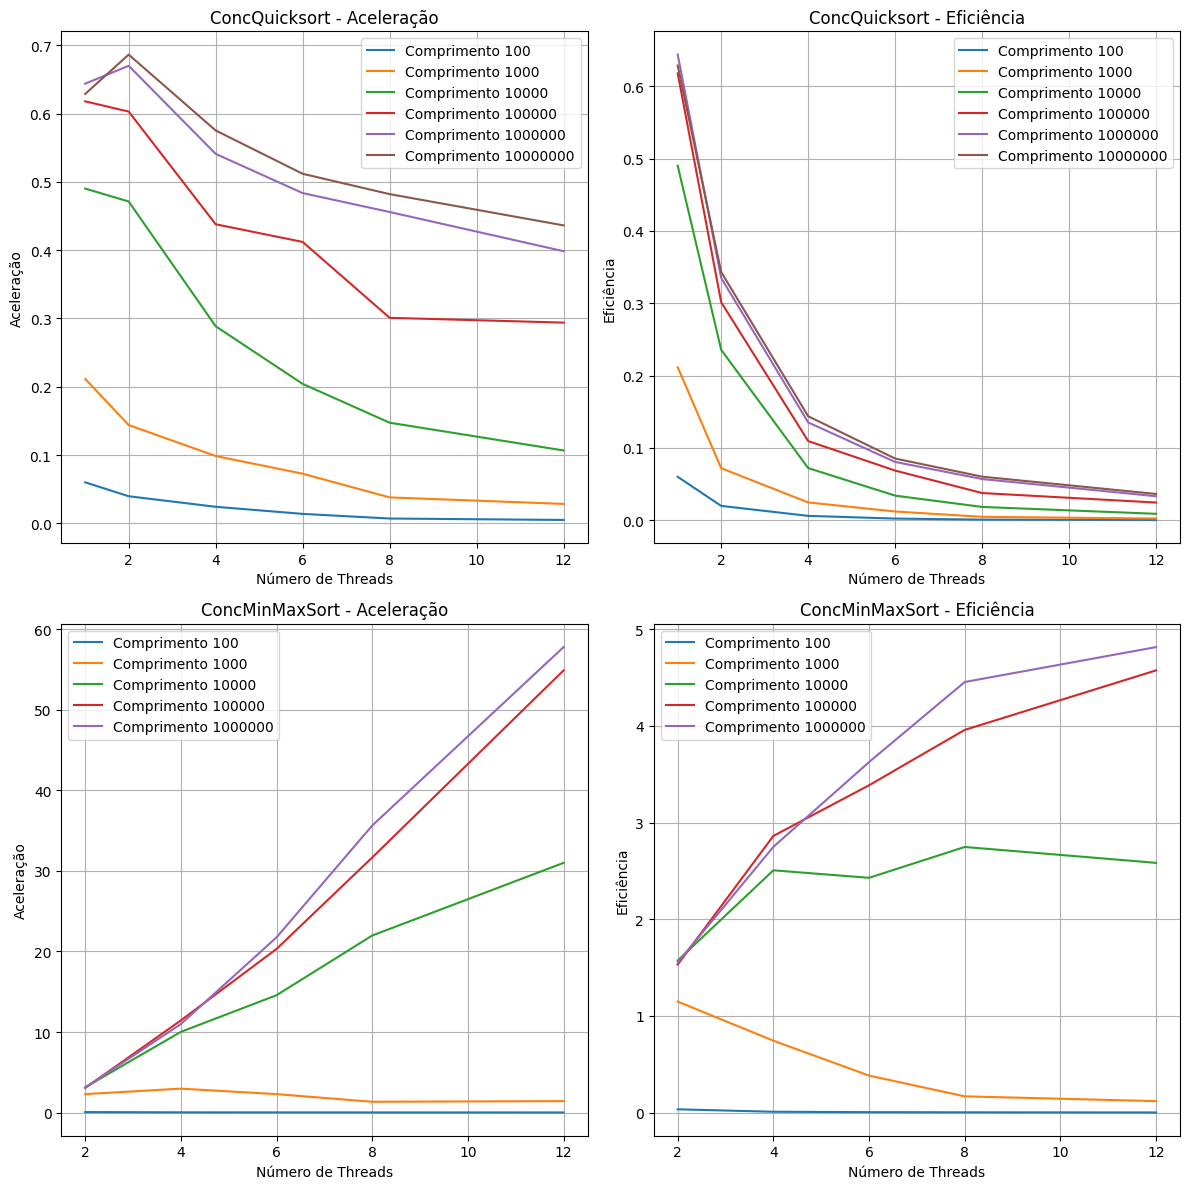

In [43]:
# Save the results to Excel
resultados_df.to_excel("InputRandomExcel.xlsx", index=False)

# Create the figure for the plots
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Plot graphs for Quicksort and MinMaxSort
plotar_graficos(resultados_df, "ConcQuicksort", axs[0, 0], axs[0, 1])
plotar_graficos(resultados_df, "ConcMinMaxSort", axs[1, 0], axs[1, 1])

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

### Input Ordem Aleatória

In [44]:
# Caminho do arquivo CSV
caminho_arquivo = "InputRandom.csv"

# Chamar a função para calcular aceleração e eficiência
resultados_df = calcular_aceleracao_eficiencia(caminho_arquivo)

# Exibir os resultados
resultados_df[resultados_df['Programa Concorrente'] == "ConcQuicksort"].describe()

,Comprimento,Threads,Aceleração,Eficiência
count,5.100000e+01,51.000000,51.000000,51.000000
mean,1.489581e+08,5.941176,0.760080,0.246465
std,3.965815e+08,3.812672,0.564676,0.338260
min,1.000000e+01,1.000000,0.000737,0.000061
25%,1.000000e+03,2.000000,0.094143,0.018947
50%,1.000000e+05,6.000000,0.835823,0.122552
75%,1.000000e+07,8.000000,1.300491,0.283803
max,1.410065e+09,12.000000,1.471783,1.449955


In [45]:
resultados_df[resultados_df['Programa Concorrente'] == "ConcMinMaxSort"].describe()

,Comprimento,Threads,Aceleração,Eficiência
count,30.000000,30.000000,30.000000,30.000000
mean,185185.000000,6.400000,12.153155,1.728962
std,372396.735224,3.499754,17.739935,1.841904
min,10.000000,2.000000,0.000000,0.000000
25%,100.000000,4.000000,0.047843,0.009025
50%,5500.000000,6.000000,3.013631,1.308172
75%,100000.000000,8.000000,19.492725,3.173935
max,1000000.000000,12.000000,65.563607,5.463634


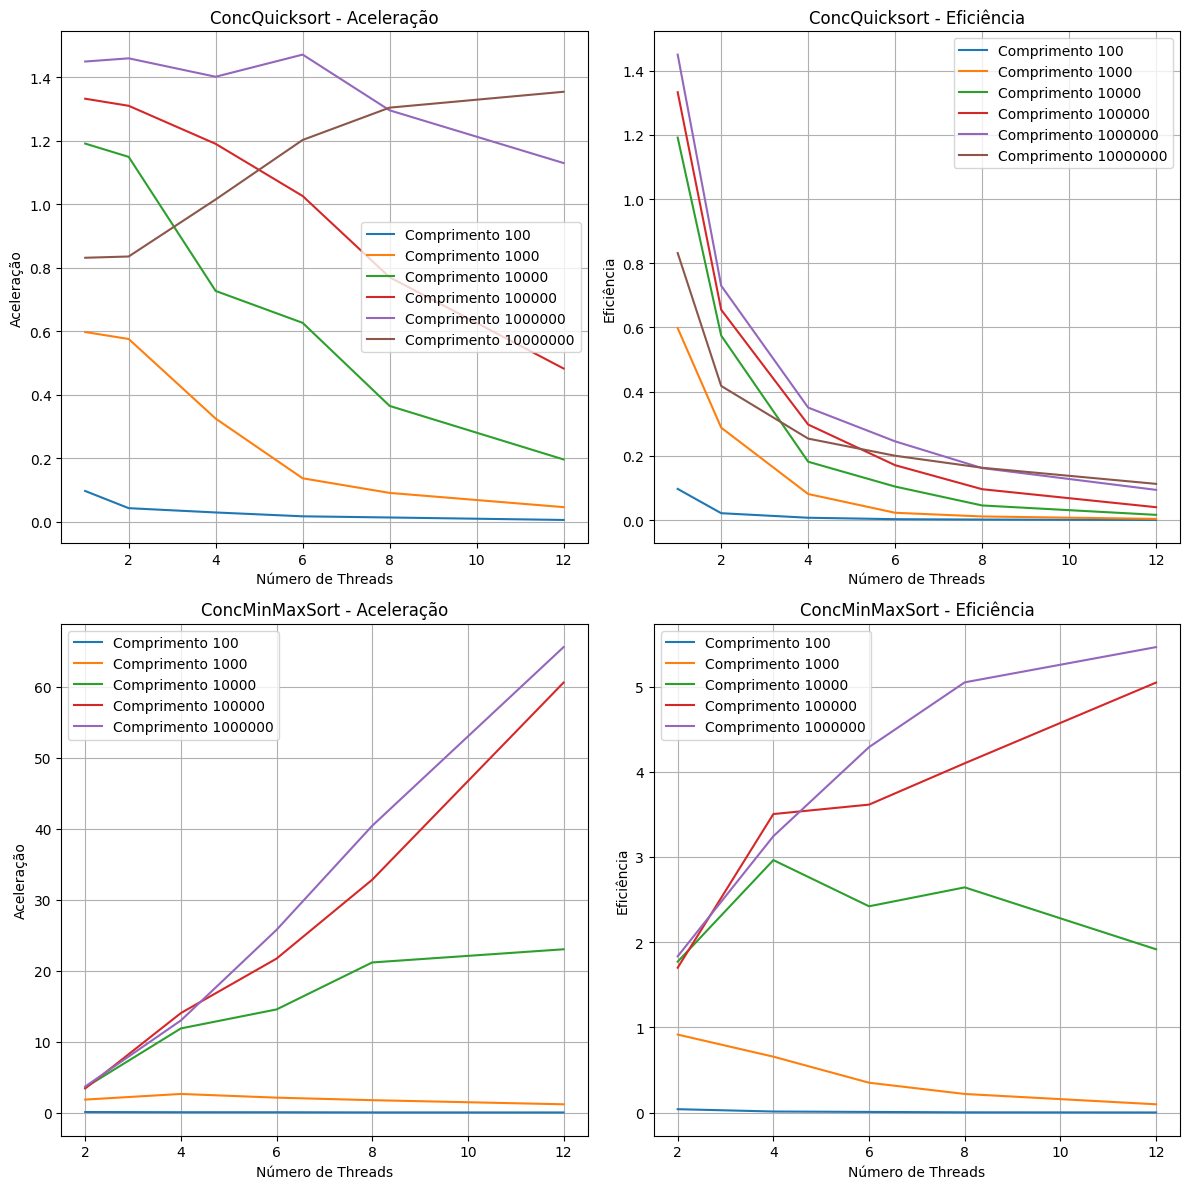

In [46]:
# Save the results to Excel
resultados_df.to_excel("InputRandomExcel.xlsx", index=False)

# Create the figure for the plots
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Plot graphs for Quicksort and MinMaxSort
plotar_graficos(resultados_df, "ConcQuicksort", axs[0, 0], axs[0, 1])
plotar_graficos(resultados_df, "ConcMinMaxSort", axs[1, 0], axs[1, 1])

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()